<a href="https://colab.research.google.com/github/EricBojs/ME1316-Kompendium/blob/master/5-Streamingaff%C3%A4ren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 Valutaoptioner med Streamingaffären

In [ ]:
# Installera Pandas som ger python möjlighet att läsa filer: .csv & .xlsx
!pip -q install pandas
# Installera yFinance som kopplar till kursdata från Yahoo Finance
!pip -q install yfinance
# Installera Matplotlib som låter oss rita diagram
!pip -q install matplotlib
# Bibliotek för att räkna med vektorer och liknande i python
!pip -q install numpy

In [ ]:
# Importera Matplotlib som låter oss rita grafer!
import matplotlib.pyplot as plt # För att rita grafer
import yfinance as yf           # För Yahoo Finance
import numpy as np              # För matematik-funktioner
import pandas as pd             # För att hantera dataframes (excel-blad)
# Redigerar standardinställningar för matplotlib
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
plt.style.use('bmh') 

Efter ditt lyckade projekt med Robyn Green på Streamingaffären har ledningen förflyttad dig till en ny roll på *internationella scoutavdelningen*. Ett nystartat utskott ska hitta stora, *lite mer vågade*, filmer och tv-serier som ska kunna visas för hela den europeiska marknaden. 

Som väl upplyst om kundernas smak har du fått ansvaret och sökt med ljus och lykta efter nästa stora inköp. Till slut har ett litet mexikanskt produktionsbolag väckt ditt intresse med sin kommande tv-serie *Knarkos Suecia*. Serien stämmer, enligt din dataanalys, in på alla preferenser som era utländska kunder besitter: spänning, mord och drama. 

Du bestämmer genast med med att skicka iväg en förfrågan om ett licensköp. Svaret anländer den varma första juli-morgonen 2020. Kostnaden för licensen är på 2.5 miljoner peso för samtliga 10 avsnitt i första säsongen för fem år framåt med sändningsrättighet i *hela* Europa. Vilket kap! Men ruskigt nära det pris ledningsgruppen har satt sin inköpsbudget för det kommande året. 

Du ryser. Kontraktet måste vara klart så fort som möjligt för att hindra era konkurrenter till att noppa åt sig serien. Något avslappnade är faktumet att betalningen inte behöver ske förrän nästa sommar. *Men vänta nu,* 2,5 miljoner pesos, vad kommer det kosta oss om 12 månader?

Licensköpet är otroligt viktigt för den övergripande strategin: Att fånga och behålla en stor kundkrets. Men är å andra sidan en potentiell stötesten för en redan ansträngd ekonomisk situation på företaget. Du har fått klara instruktioner om en inköpsbudget på 1 050 000 kr för hela det kommande räkneskapsåret, allt som allt. En eventuellt överskridande summa måste finansieras med dyra lån. Samtidigt är varenda sparad krona en krona tillbaka företaget som kan hålla er över ytan lite längre. 

Du lägger upp de två alternativet du har på bordet:

1. Köp 2,5 miljoner pesos idag. *Risklöst, men dyrt då det låser budgeten tidigt på året.*

2. Vänta 12 månader och hoppas på att kronan blir mer värd mot peson. *Riskfullt men förhoppningsvis billigt.*

Du inser nu att du *ännu en gång* behöver göra en kvantitativanalys som ska ligga till grund för beslutfattande. Det som behövs göra är att få till en prognos kring volatiliteten, och således risken, mellan svenska kronan `SEK`, och mexikanska pesos `MXN`.

Försa steget är att hämta hem historisk data om valutakursen.

Yahoo Finance saknar data från svenska kronan `SEK` till mexikanska peson `MXN`, så vi blir tvungna att gå från amerikanska dollarn `USD` i ett mellansteg.

In [ ]:
# Ladda hem historisk data från Yahoo Finance
USDSEK = yf.download('SEK=X','2017-07-01','2020-07-01')
USDMXN = yf.download('MXN=X','2017-07-01','2020-07-01')

MXNSEK = pd.DataFrame() # MXN/SEK
MXNSEK['Close'] = USDSEK['Close']/USDMXN['Close']
print(MXNSEK.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
               Close
Date                
2017-07-03  0.463327
2017-07-04  0.465795
2017-07-05  0.464776
2017-07-06  0.464735
2017-07-07  0.466889


            Close
count  780.000000
mean     0.464180
std      0.029461
min      0.399024
25%      0.442014
50%      0.465087
75%      0.489942
max      0.526995


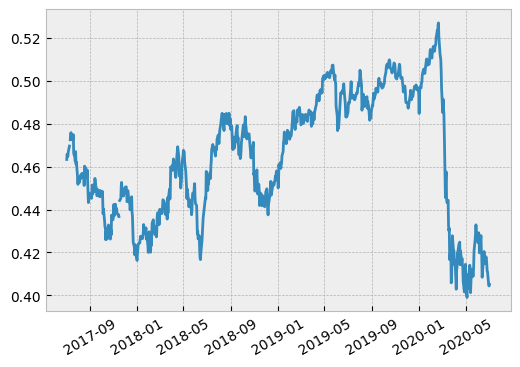

In [ ]:
print(MXNSEK.describe()) # En bild av datan du hämtat hem
plt.plot(MXNSEK['Close'])
plt.xticks(rotation=30)
plt.show()

3 år är en väldigt lång mycket data. Så vi kan plocka ut ett stickprov!

In [ ]:
stickprov = MXNSEK['2019-01-01':'2020-07-01'] # kan behöva ändras

För att hitta rätt i denna djungel behövs en kvantitativ analys kring volatiliteten. Hur du bestämer den är upp till dig

*   Ska en statisk eller adaptiv modell användas i detta läge? 
*   Vilka antaganden bygger jag min prognos kring? kan jag testa dessa antagande?
*   Hur ser min data ut? Vilken fördelning ser det ut att vara? 
*   Finns det ytterligare värde med att komplettera med en kausal prognos? 

Estimera $\sigma$ utifrån valfri modell.

In [ ]:
sigma = modell(stickprov, parametrar)

Om växelkursen om ett år $S_{T}$ följer:

$$S_{T} \sim N(S_0, \sigma \sqrt{T_1})$$

Vad är risken att du kommer överskrida budgeten?

$$\text{Risk} = P[S_{T} \geq S_{krit}]$$

Där $S_{krit}$ är den kritiska växelkurs då budgeten spricker!

Vilken tankeställare, tänker du samtidigt som du rör dig mot dagens tredje kopp kaffe. Väl vid kaffemaskinen står finansnissen Hans, och inte kan du inte låta att bikta dina bekymmer.

– Men! Det finns ju ett tredje alternativ, skriker Hans ut:

3. Köp en valutaoption som skyddar mot dyr peso, men samtidigt behåller vinsten om billig.

– Jag ringer banken genast och kollar vad det kan kosta, fortsätter han samtidigt som han hasar sig iväg.

En halvtimma senare glider han in på ditt kontor med ett klart bekymmersamt ansiktsuttryck.

– Femtiotusen kronor för en säkran på $2,25$ `SEK/MXN` för 2,5 miljoner pesos, dvs ca 5 öre per option. kastar han ur sig. Över budget, men det kanske är värt ändå?

Din uppgift är att presentera en optimal handlingsväg för ledningsgruppen. Vilken av de tre alternativen bör man välja? Finns det en annan, bättre, väg att gå?

**Till hjälp:**

`1 juli 2020` var reporäntan för `MXN`:$r_f = 5\%$; och för `SEK`: $r_d = 0\%$, $T=$ ett år.

Måste du skydda hela beloppet? Vilken volatilitet räknar banken med? Kan du föreslå ett annat $K$ som är mer fördelaktig för din situation, men som banken fortfarande borde gå med på? Finns det alternativa optionsstrategier som kan vara fördelaktiga?

